# Part 3: A Slightly More Complex Agent Based Model 

##### Authors: Bill Thompson (biltho@mpi.nl) and Limor Raviv (limor.raviv@mpi.nl) 
Please let us know if you have any comments, suggestions or questions regarding this notebook. 

---------------

## Summary
In this third tutorial, we will build a more complex simulation of agents using the commands in the second notebook, making our agents and their interactions a bit more ecologically valid. 

The major differences between these models are:
1. Instead of having agents with simple binary representaions (either [a] or [i]), agents in this model will have a distribution around their prefered vowel.
2. The interactions in this model will be double-sided, so that both agents change their behavior after interacting.
3. Agents' personalities will be less rigid, allowing for more intersting changes during interaction: stubborn agents will align a little bit (instead of not at all), while flexible agents will align to a greater extent (but not fully).

We will make multiple simulations of inertactions under different conditions, and see how this affects the distribution of vowels in the population. 


-------------- 


### 1. Setting up the network
First, let's create lists containing the possible biases for our agents. In this more complex model, agents have a range of possible vowels they can produce, which is distributed normally around a mean value on a single dimension. In this exmaple, a mean of "-1" will correspond to [a] and a mean of "1" will corresponf to [i].

In [3]:
# Set the model Parameters

vowel_means = [-1., 1.] # set possible inital means for the distributions

personalities = ['F', 'S']

In [4]:
# Create a function that makes a single agent based

def make_agent(vowel_mean, personality):
    return [vowel_mean, personality]


In [5]:
# Create a function that makes a population of random agents

import random

def make_population(N):
    
    population = []
    
    for i in range(N):
        
        m = random.randint(0,1)
        
        p = random.randint(0,1)
        
        agent = make_agent(vowel_means[m], personalities[p])
        
        population.append(agent)

    return population


# Check that this works by making a population of 8 agents
make_population(8)


[[-1.0, 'S'],
 [1.0, 'F'],
 [1.0, 'S'],
 [1.0, 'S'],
 [-1.0, 'F'],
 [-1.0, 'S'],
 [1.0, 'S'],
 [1.0, 'S']]

### 2. Introducing more complex interations
So far, this looked similar to our simple model, but now it's time to introduce some new features.

Because we want our agents to have more complex representations, we also need to write a function that selects a specific vowel from the distribution implied by he agent's mean,  for each interaction.

In [83]:
# Create a function that chooses a variant from a distribution centered around the agent's mean vowel

from copy import deepcopy 
from numpy.random import normal
import numpy

def choose_utterance(agent):   # sample from a normal distribution with SD=0.25 and mean of the teacher
    agent_utterance=normal(agent[0],.25)
    return agent_utterance

# Let's check that this works
# You can run this multiple times to see different chosen utternaces for different agents

pop=make_population(4)
vowel = choose_utterance(pop[0])
print "The agent's mean was", pop[0][0]
print "The agent's chosen utterance is", vowel

The agent's mean was -1.0
The agent's chosen utterance is -1.16257882793


In this new model, being flexible means that the agent shifts their vowel towards the other agents' utterance (by half of the distance between the mean and the utterance). This just means flexible agents adapt by going half way towrads the other agent. 

In addition, stubborn agents are not completey stubborn and are only adapting by a little bit (by 1/10 of the distance between their mean and the other agent's utterance).

Let's try to write this function that changes the agents means according to their biased personalities, using simple conditions:

In [16]:
# Create a function that shifts the means of a flexible agent

def learn(utterance,agent):
    if agent[1] == "F":
        new_mean = (agent[0] + utterance) / 2.
    else:
        difference = abs(utterance-agent[0])
        if utterance > agent[0]:
            new_mean = agent[0] + (difference/10.)
        else:
            new_mean = agent[0] - (difference/10.)
    agent[0] = deepcopy(new_mean)


# Check that this works

# Create two agents with a mean of 1
stb_agent = [1,'S']
flex_agent = [1,'F']

# See what happens when each agent learns from an untterance of -1 (the other vowel)
learn(-1,stb_agent)
learn(-1,flex_agent)

print stb_agent
print flex_agent

[0.8, 'S']
[0.0, 'F']


Now, we want both agents to update their representations after an interaction. This means that instead of having single-sided interactions with a listener and a producer, we now have an exchange of productions between the two agents in which each can learn from each other... 

For this, we'll write a new function that updates both agents based on their current utterances:

In [29]:
# Create a function in which both agents generate utterances and can learn from each other 

def interact((agent1,agent2)): 
    
    agent1_utterance = choose_utterance(agent1)
    agent2_utterance = choose_utterance(agent2)
    
    if agent1[0] == agent2[0]:
        pass # do nothing if the two agents have the same distributions 
    else:
        learn(agent2_utterance,agent1)
        learn(agent1_utterance, agent2)
    #return agent1_utterance, agent2_utterance, agent1, agent2
        

# Check if it works by uncommenting the "return" comment above 

interact(([-1,'F'],[1,'S']))

### 3. Simulation time!
Great! Now we have a double-sided interaction, and we can write a function that chooses random pairs from a populations, and then simulate multiple interactions between different agents.

In [18]:
# Create a function that chooses two agents from a population
from numpy.random import choice

def choose_pair(population):
    i = random.randint(0, len(population) - 1) # phyton counts from 0, so pop(8) is an error
    j = random.randint(0, len(population) - 1)
    
    while i == j:
        j = random.randint(0, len(population) - 1)
        
    return population[i], population[j]

# Create a function that simulates k interactions in a population of n agents

def simulate(n, k):
    
    initial_population = make_population(n)
    population=deepcopy(initial_population)
    
    for i in range(k):
        
        pair = choose_pair(population)
        
        interact(pair)
    
    return initial_population, population

Let's test that our simulation is working by looking at the results. Feel free to change the number of agents and the number of interactions as you please.

The initial population was [[1.0, 'F'], [-1.0, 'F'], [1.0, 'S'], [-1.0, 'F'], [-1.0, 'S'], [-1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [1.0, 'S'], [-1.0, 'F'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'F'], [-1.0, 'S'], [1.0, 'F'], [1.0, 'F'], [1.0, 'S'], [-1.0, 'S']]
The new population is [[-0.07866503863251557, 'F'], [0.04896398924587536, 'F'], [-0.3001408330776343, 'S'], [-0.039954924576553405, 'F'], [-0.12945597757816416, 'S'], [-0.2015649483689273, 'F'], [-0.1001187425645372, 'F'], [-0.41211419600372917, 'F'], [-0.23110445510906127, 'S'], [-0.3597747876594809, 'F'], [-0.21584563604160767, 'S'], [-0.2541813507520245, 'S'], [-0.17227383200141466, 'S'], [-0.18588065754292563, 'S'], [-0.13561999273076236, 'F'], [-0.3251284281921554, 'S'], [-0.10932799791411132, 'F'], [0.06234286706059899, 'F'], [-0.16335107317676326, 'S'], [-0.20130332231362194, 'S']]


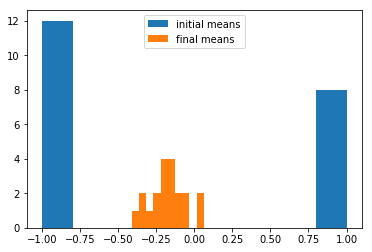

In [132]:
# Run a simulation with 8 agents and 5000 interactions

initial_population, new_population = simulate(20,5000)

print "The initial population was", initial_population
print "The new population is", new_population

# Plot the agents' initial and final means

%matplotlib inline 
# put plot in the notebook
import matplotlib.pyplot as plt # importing a plotting library

initial_means = []
final_means = []

for agent in range(len(initial_population)):
    initial_means.append(initial_population[agent][0])
    final_means.append(new_population[agent][0])
    
plt.hist(initial_means, label='initial means')
plt.hist(final_means, label='final means')
plt.legend(loc='upper center')
plt.show()  

In the plot above, the clustering of organge agents (final population) shows convergence, while the spread distribution (blue, initial population) implies divergence.

In most simulations, you'll see convergence.

But since as you've seen, each simulation yields different outcomes in terms of which variant agents have converged on, we need to run multiple simulations and compute their mean to get a more reliable picture of what's happening. So let's make a function that computes the final means of several simulations.

In [26]:
# Create a function to compute the means of the vowels in the population

def compute_mean(population):
    t=0.
    for agent in population:
        t += agent[0]
    return t/len(population)

# Create a function that runs multiuple simulations and returns the final mean of each of them

def batch_simulate(n,k,s): #n=pop size, k=no. of interactions, s=no. of simulations
    batch_final=[]
    for i in range(s):
        initial_population, new_population = simulate(n, k)
        new_proportion=compute_mean(new_population)
        batch_final.append(new_proportion)
    return batch_final
        

So what's going on? Let's run some simulations! This might take a few minutes to complete.

Text(0,0.5,u'Number of Simulations')

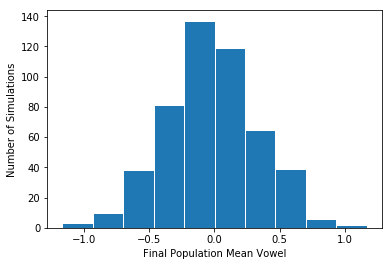

In [27]:
# Run 500 simulations
results = batch_simulate(20,5000,500)

# Plot the result
import seaborn as sns # make the plot look better
plt.hist(results, edgecolor = 'white')
plt.xlabel('Final Population Mean Vowel')
plt.ylabel('Number of Simulations')

What you can see in the historgram above is that there is a nice normal distribution around 0. That is, **in most simulations, the population converges on the mean between the two initial variants**. This result is exactly what we expect given prior studies with similar models.

So let's probe this model a bit more by looking at effect of stubborn agents in the poopulation. 

As we did in the second tutorial, we will see if the number of stubborn agents affects the trend of convergence towards the mean. We'll do this by rewriting the functions defined above so that they created biased populations where we control the number of stubborn agents:

In [81]:
# Modify the function to make populations of N agents with a given number of stubborn agents (st)

def make_population_biased(N,st):
    
    population = []
    
    for i in range(st):
        
        m = random.randint(0,1)
        
        agent = make_agent(vowel_means[m], personalities[1])
        
        population.append(agent)
    
    for i in range(N-st):
        
        m = random.randint(0,1)
        
        agent = make_agent(vowel_means[m], personalities[0])
        
        population.append(agent)

    return population



# Modify the function so that it calls our biased population 

def simulate_biased(n, k, st):  #st=no. of stubborn
    
    initial_population = make_population_biased(n,st)
    population=deepcopy(initial_population)
    
    for i in range(k):
        
        pair = choose_pair(population)
        
        interact(pair)
        
    return initial_population, population

We can check that our changes work by simulating one population first. You can change the number of stubborn agents to see how it affects the results.

The initial population was [[-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [1.0, 'F']]
The new population is [[-0.3210847847394562, 'S'], [-0.3320432553415883, 'S'], [-0.31897996404847195, 'S'], [-0.21381756840188915, 'S'], [-0.2925919701829233, 'S'], [-0.39259493656970684, 'S'], [-0.3825242168813835, 'S'], [-0.26190094139372644, 'S'], [-0.26630879568451576, 'S'], [-0.4071937449531068, 'S'], [-0.33502525936126043, 'S'], [-0.4153402264619839, 'S'], [-0.326031361460032, 'S'], [-0.29168352819657234, 'S'], [-0.37646425703403186, 'S'], [0.07934487191202322, 'F'], [-0.10411522307271945, 'F'], [0.032165609611911415, 'F'], [-0.34370947972633625, 'F'], [-0.15387162029383072, 'F']]


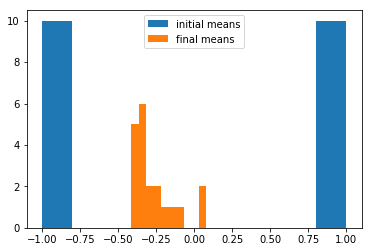

In [93]:
# Simulate a population with 15 stubborn agents
old_pop, new_pop =simulate_biased(20,5000,15)

print "The initial population was", old_pop
print "The new population is", new_pop

# Plot the agents' initial and final means

initial_means = []
final_means = []

for agent in range(len(old_pop)):
    initial_means.append(old_pop[agent][0])
    final_means.append(new_pop[agent][0])
    
plt.hist(initial_means, label='initial means')
plt.hist(final_means, label='final means')
plt.legend(loc='upper center')
plt.show()  

Because we want to look at the degree of convergence and how it's affects by stubborn agents, we need a measure to capture variance, like SD or entropy. For now, we will write a function that stores the SDs of the final means' distribution in multiple simulations. This will give us an idea of how diverged the population was after interacting. 

In [123]:
# Create a function to compute the standard deviation of the vowels in the population

def compute_SD(population):
    pop_means=[]
    for agent in population:
        pop_means.append(deepcopy(agent[0]))
    pop_SD= numpy.std(pop_means)
    return pop_SD


def batch_simulate_biased(n,k,s): #n-pop size, k=no. of interactions, s=no. of simulations for each bias
    
    all_results=[]
    
    possible_sts = [0, int(n / 10.), int(n / 4.), int(n / 2.), int(3*n / 4.), n]
    # This time, we'll test 0%, 10%, 25%, 50%, 75% and 100% stubborn agents
    
    for st in possible_sts:
        
        print st
    
        current_results = []  # print the progress of the simulations 
    
        for i in range(s):
            initial_population, new_population = simulate_biased(n, k, st)
            sd = compute_SD(new_population)
            current_results.append(sd)
        
        all_results.append([st,current_results])
    
    return all_results


Now, let's run a few simulations with different proportion of stubborn agents, and see what happens:

In [139]:
# Run 20 simulations of each stubborness proportions in a community of 200 agents 
results = batch_simulate_biased(200,5000,20)


# Show the results
print results

0
20
50
100
150
200
[[0, [0.17030724892353283, 0.16052266945944318, 0.18912744547079471, 0.16991828631174258, 0.20880827953388784, 0.16819466302745445, 0.18120091129932647, 0.16679860644912045, 0.18476956334080435, 0.19480286466726807, 0.17957474652285318, 0.15770236952552244, 0.16777965130500108, 0.16457067814412815, 0.17037313920995223, 0.17467792364912541, 0.16289963070502927, 0.18781747268819943, 0.15397986669036051, 0.1833533938723762]], [20, [0.1678775406174593, 0.17406708989551653, 0.15929736310782305, 0.1609487151376269, 0.17381846086558611, 0.16753427937976723, 0.17510724578606454, 0.16903354005014948, 0.17111123905489975, 0.150094277714759, 0.16429449702057725, 0.14961737757172297, 0.1720342370478127, 0.15825648170298129, 0.162191630128833, 0.16305180429139549, 0.18171266707294978, 0.17447737549687076, 0.16524721962116709, 0.16926951668342582]], [50, [0.12708627612351994, 0.15684876883023852, 0.15457657564906899, 0.14616975311066971, 0.14797144071367554, 0.13727697301452155, 

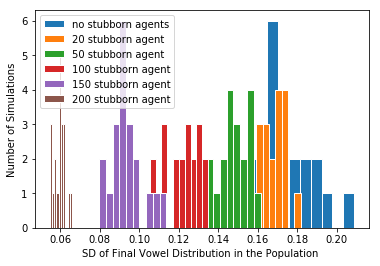

In [140]:
# Plot the results of the simulations 
        
plt.hist(results[0][1], label='no stubborn agents',edgecolor = 'white')
plt.hist(results[1][1], label='20 stubborn agent',edgecolor = 'white')
plt.hist(results[2][1], label='50 stubborn agent',edgecolor = 'white')
plt.hist(results[3][1], label='100 stubborn agent',edgecolor = 'white')
plt.hist(results[4][1], label='150 stubborn agent',edgecolor = 'white')
plt.hist(results[5][1], label='200 stubborn agent',edgecolor = 'white')
plt.legend(loc='best')
plt.xlabel('SD of Final Vowel Distribution in the Population ')
plt.ylabel('Number of Simulations')     
plt.show()  

As you can see, there is a clear relationshop between the degree of convergence and the number of stubborn agents in the population. The results suggest that populations with more flexible agents show higher variance, while populations with more stubborn agents show less variance and greater convergence. However, the SD in all condition is rather low (<0.2) suggesting that all population converged to some degree. However, populations that comprise of *only* stubborn agents reached the highest convergece.

## Wrapping up
So you did it! You finished the tutorial and made a model with more complex agents and complex interactions. 

Hopefully, now you feel confident enough to change different parts of the code, or add your own new features. 

Good luck with your model!

Bill & Limor